### 0. Importing important liberaries

In [67]:
import nltk
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import sys, os


In [68]:
sys.path.append(os.path.abspath(os.path.join('../..')))

#### Load The data

In [69]:
raw_data = pd.read_csv('../data/processed_tweet_data.csv')

In [75]:
raw_data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,2356,355,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,1985,505,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,16,4,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,1242,332,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,1329,386,McMc74078966,3,12,False,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN


In [76]:
raw_data.tail()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
24620,Fri Apr 22 14:44:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...,0.0,0.0,mr,2342,242,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'waglenikhil', 'name': 'nikhi...",NaN
24621,Fri Apr 22 14:44:44 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...",0.0,0.0,hi,2298,242,kitukalesatya,706,643,False,[],"[{'screen_name': 'yadavtejashwi', 'name': 'Tej...",NaN
24622,Fri Apr 22 14:44:35 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @Parthtiwari25: Gujarat Congress MLA arrest...,0.0,0.0,en,1025,203,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'Parthtiwari25', 'name': 'Par...",NaN
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,0.0,0.0,hi,3735,301,kitukalesatya,706,643,False,[],"[{'screen_name': 'news24tvchannel', 'name': 'N...",NaN
24624,Fri Apr 22 14:43:01 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @suvegrathi: भगवान और खुदा आपस में बात कर र...,0.0,0.0,hi,10,12,kitukalesatya,706,643,False,[],"[{'screen_name': 'suvegrathi', 'name': 'Suveg ...",NaN


### 1. 	Data consistency check 
#### 1.1. Discover Rows, Columns and Data Types

In [77]:
raw_data.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [78]:
print((raw_data['favorite_count'].map(type) != int).values.any())
print((raw_data['retweet_count'].map(type) != int).values.any())
print((raw_data['followers_count'].map(type) != int).values.any())
print((raw_data['friends_count'].map(type) != int).values.any())


False
False
False
False


#### NB: The above result shows all of the selected attributs of data type has consistent data type

### ==> It looks our data is consistent with respect to numerical attributes

### 2. Data Pre-Processing

In [79]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9854 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  place               15731 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.8+

In [ ]:
#to explore if there are missing and duplicated values

### check for data duplication

In [125]:
raw_data.duplicated().sum()

0

In [138]:
ct = Clean_Tweets()

TypeError: __init__() missing 1 required positional argument: 'df'

In [128]:
df = raw_data.copy()

In [129]:
tweets = df.drop_duplicates()

In [130]:
print(f"Shape of tweets before droping duplicates tweets {raw_data.shape}")
print(f"Shape of tweets after droping duplicates tweets {tweets.shape}")

Shape of tweets before droping duplicates tweets (24625, 15)
Shape of tweets after droping duplicates tweets (24625, 15)


In [126]:
print("The number of missing value(s): {}".format(raw_data.isnull().sum().sum()))
print("Columons having columns value:{}".format(raw_data.columns[raw_data.isnull().any()]))

The number of missing value(s): 23665
Columons having columns value:Index(['possibly_sensitive', 'place'], dtype='object')


#### Cleaning the data

Remove non english tweets

In [134]:
df = df.drop(df[df['lang'] != 'en'].index)

In [ ]:
#Remove links

In [136]:
def find_hashtags(df):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df)



In [137]:
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188,43,davideiacovozzi,18,55,False,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN
39,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,179,32,davideiacovozzi,18,55,False,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN
41,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193,26,davideiacovozzi,18,55,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN
42,Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620,213,davideiacovozzi,18,55,False,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN
43,Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787,417,davideiacovozzi,18,55,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN


#### there aren't duplicate values in the dataset

In [52]:
from wordcloud import WordCloud,STOPWORDS

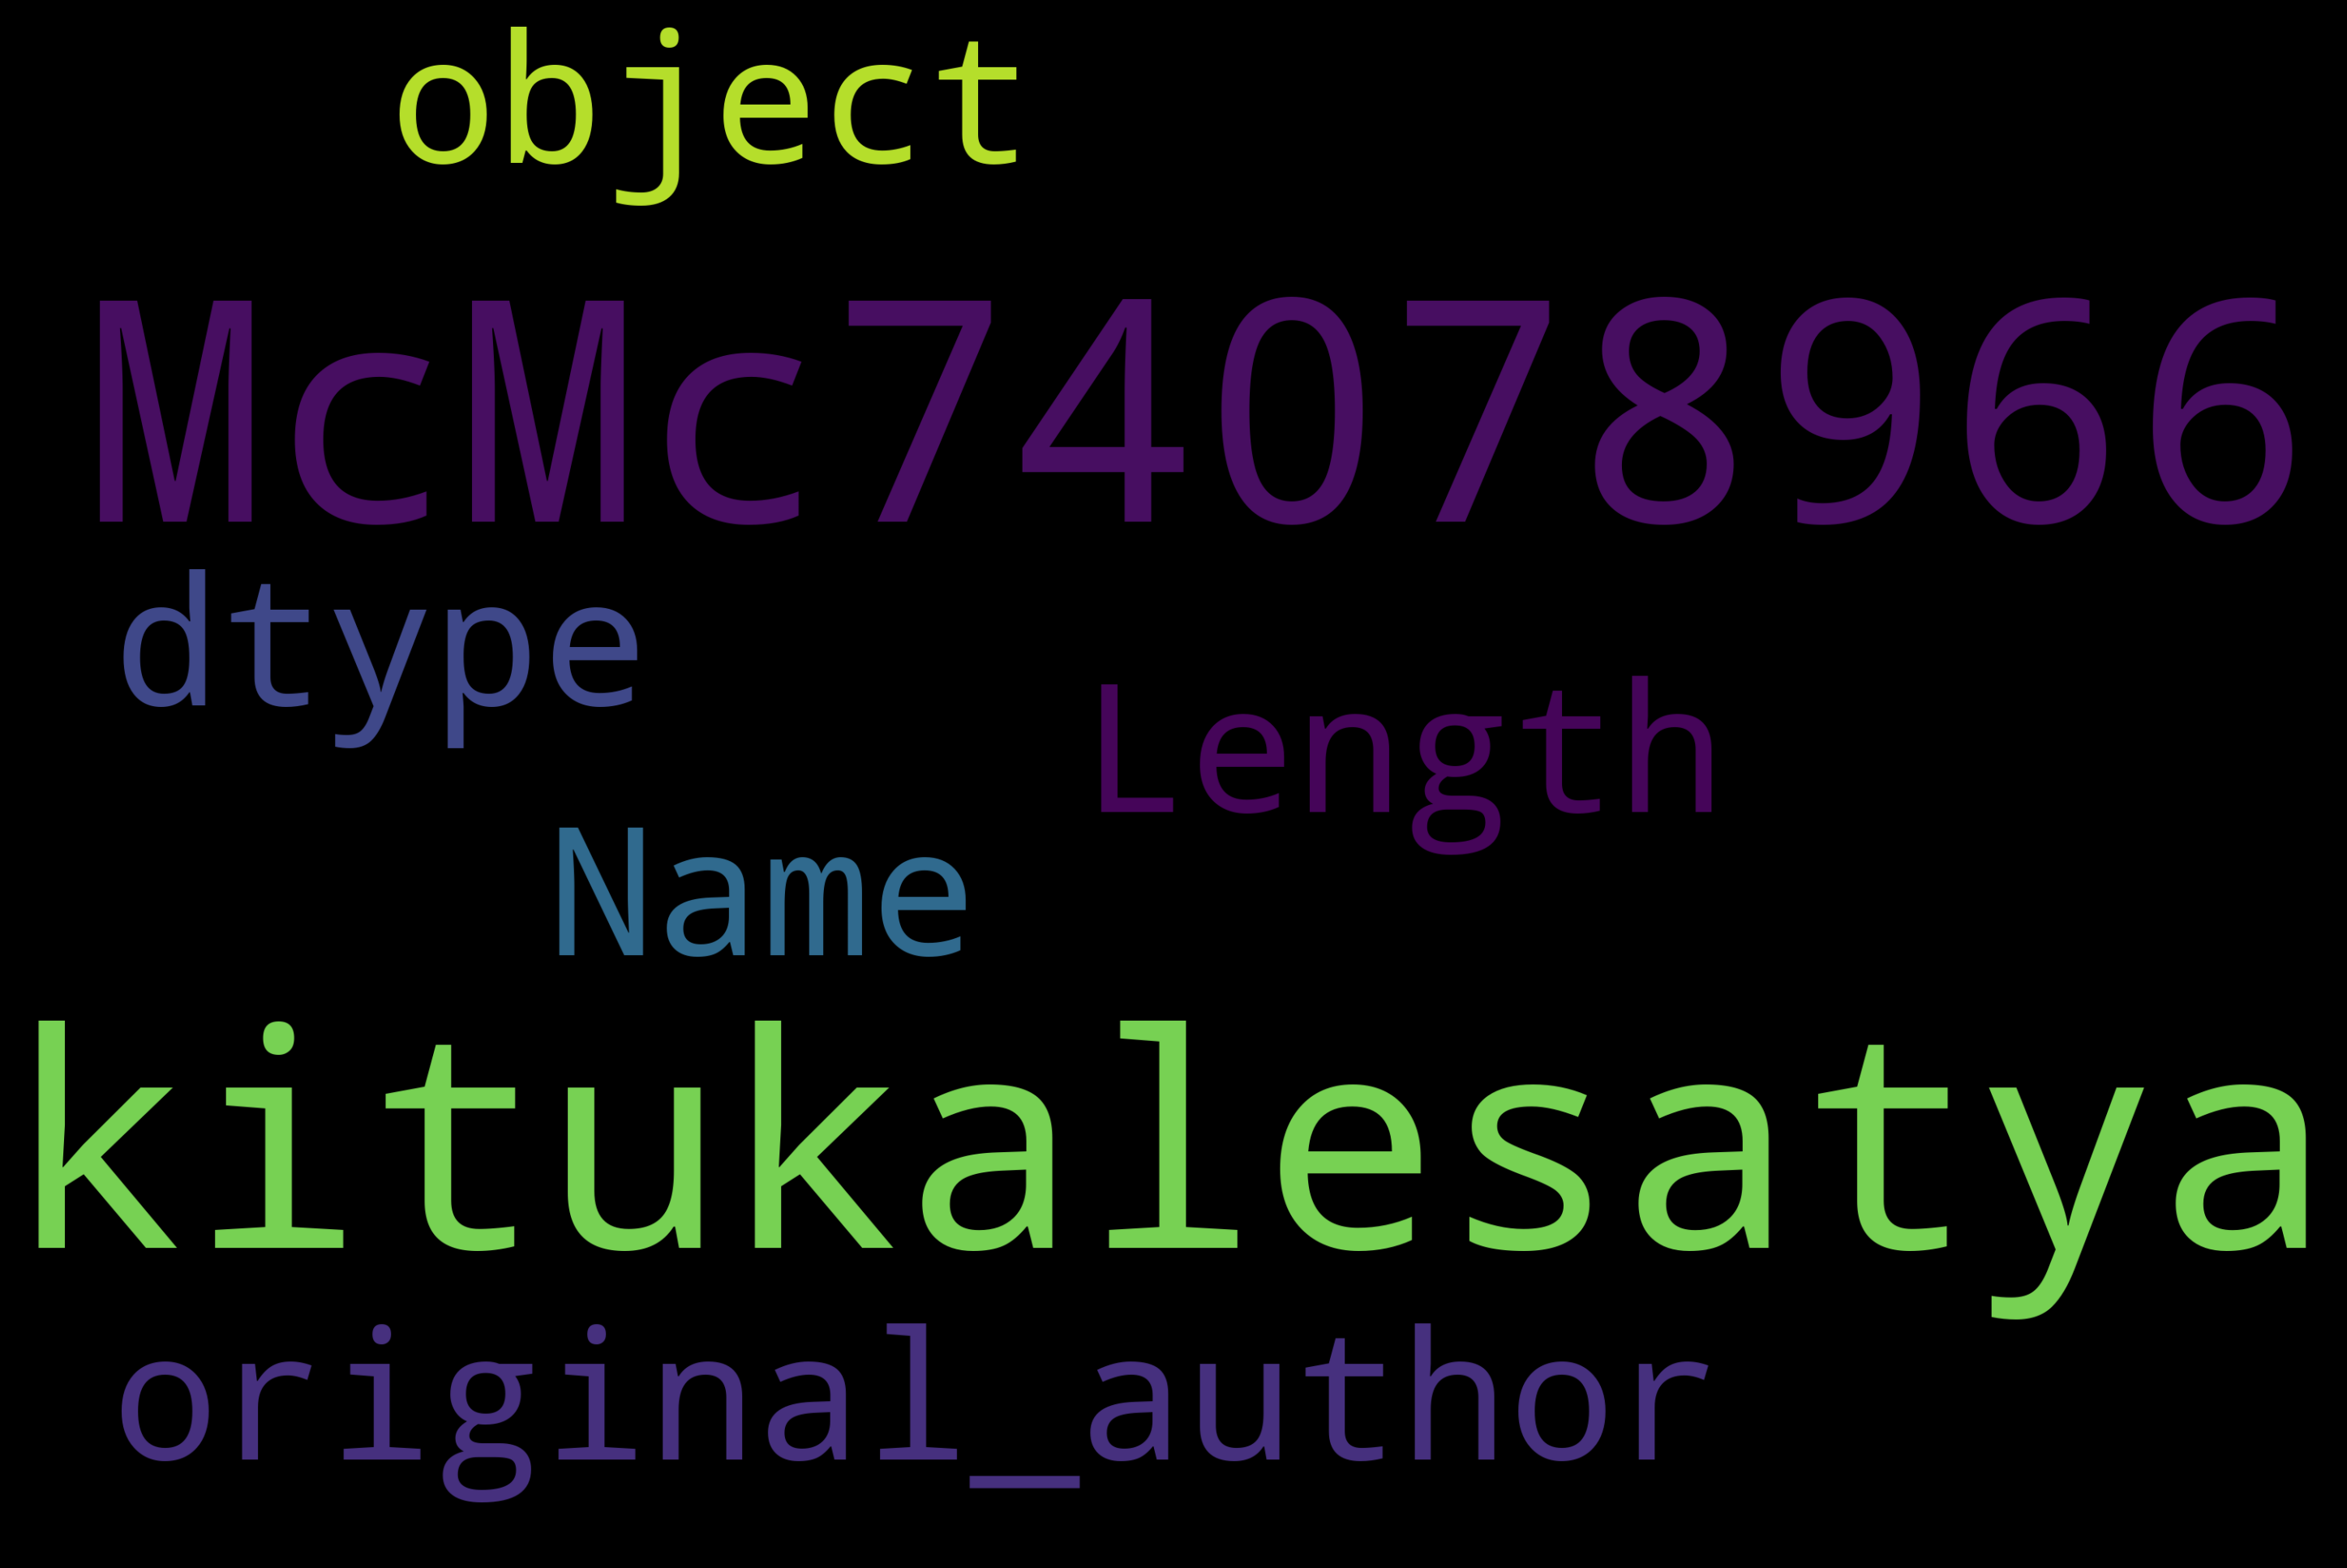

In [54]:
text = raw_data["original_author"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [66]:
raw_data.isna().mean()

created_at            0.000000
source                0.000000
original_text         0.000000
polarity              0.000000
subjectivity          0.000000
lang                  0.000000
favorite_count        0.000000
retweet_count         0.000000
original_author       0.000000
followers_count       0.000000
friends_count         0.000000
possibly_sensitive    0.599838
hashtags              0.000000
user_mentions         0.000000
place                 0.361178
dtype: float64